In [7]:
# In this example, we will explain what is an outlier, and why outlier detection helps the validity of data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

cali_houses = fetch_california_housing()
X = cali_houses.data
y = cali_houses.target
df_X = pd.DataFrame(cali_houses.data, columns = cali_houses.feature_names)
df_y = pd.DataFrame(cali_houses.target, columns = ['MedHouseVal'])
df= pd.concat([df_X, df_y], axis=1)
display(df)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [8]:
# Outlier detection depends on distances
# Detecting outliers on a single attribute MedInc through plotting the distribution 

x = df.MedInc
print(x)


0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: MedInc, Length: 20640, dtype: float64


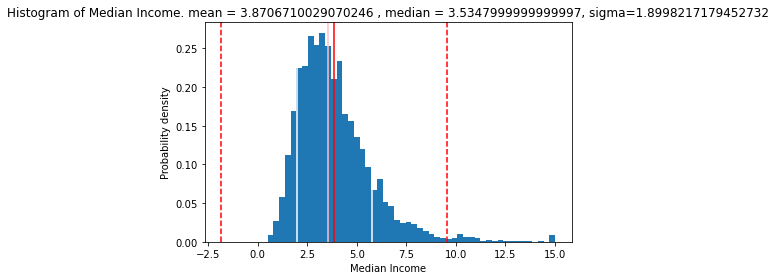

In [11]:
# Visualizing the distribution of the Median Income attribute
sigma = x.std()
mu = x.mean()
median = x.median()

num_bins = 50
fig, ax = plt.subplots()
# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

ax.set_xlabel('Median Income')
ax.set_ylabel('Probability density')
ax.set_title(f'Histogram of Median Income. mean = {mu} , median = {median}, sigma={sigma}')
ax.axvline(x=median , color = 'pink')
ax.axvline(x=mu , color = 'red')
ax.axvline(x=mu+sigma , color = 'white')
ax.axvline(x=mu-sigma , color = 'white')
ax.axvline(x=mu+sigma*3, color = 'red',linestyle = '--')
ax.axvline(x=mu-sigma*3, color = 'red', linestyle = '--')

fig.tight_layout()
plt.show()

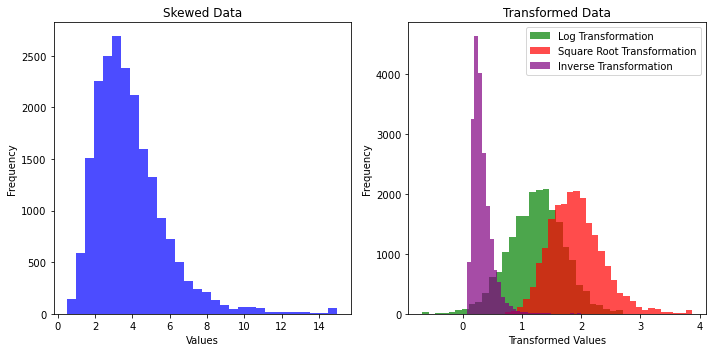

In [14]:
# Transformation of skewed data

import numpy as np
import matplotlib.pyplot as plt

skewed_data=x

# Plot the histogram of skewed data
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(skewed_data, bins=30, color='blue', alpha=0.7)
plt.title('Skewed Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

# Apply transformations
log_transformed = np.log(skewed_data)
sqrt_transformed = np.sqrt(skewed_data)
inverse_transformed = 1 / skewed_data

# Plot histograms of transformed data
plt.subplot(1, 2, 2)
plt.hist(log_transformed, bins=30, color='green', alpha=0.7, label='Log Transformation')
plt.hist(sqrt_transformed, bins=30, color='red', alpha=0.7, label='Square Root Transformation')
plt.hist(inverse_transformed, bins=30, color='purple', alpha=0.7, label='Inverse Transformation')
plt.title('Transformed Data')
plt.xlabel('Transformed Values')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


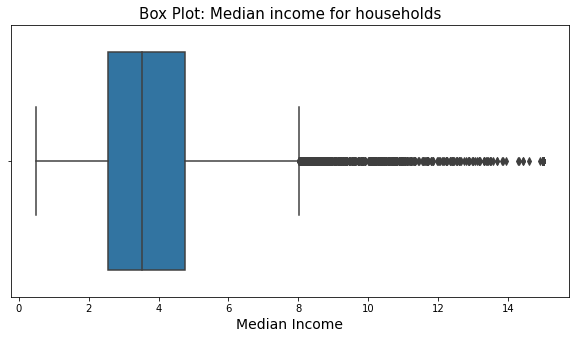

In [15]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(df.MedInc)
plt.title('Box Plot: Median income for households', fontsize=15)
plt.xlabel('Median Income', fontsize=14)
plt.show()


Minimum: 16.5
First Quartile (Q1): 24.0
Second Quartile (Q2, Median): 26.0
Third Quartile (Q3): 29.0
Maximum: 36.5
Interquartile Range (IQR): 5.0


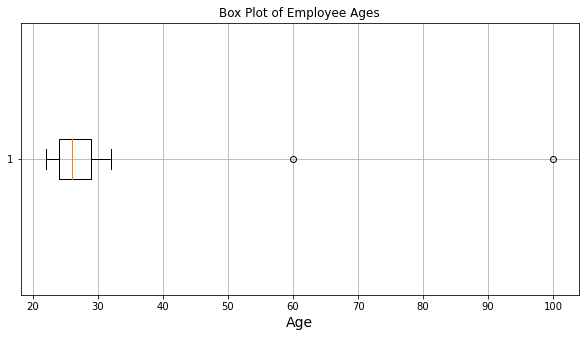

In [30]:
# Lec2 Example: Find the outliers for age of employees dataset
import matplotlib.pyplot as plt
import numpy as np

# Age of employees as the dataset
age_data = [22, 24, 23, 25, 26, 29, 28, 24, 25, 60, 23, 24, 25, 27, 26, 30, 31, 29, 27, 32, 100]

# Calculate quartiles q1,q2,q3 and IQR
q1 = np.percentile(age_data, 25)
q2 = np.percentile(age_data, 50)
q3 = np.percentile(age_data, 75)
iqr = q3 - q1

# Calculate minimum and maximum using Tukey's fences
min_value = q1 - 1.5 * iqr
max_value = q3 + 1.5 * iqr

# Print the statistics
print("Minimum:", min_value)
print("First Quartile (Q1):", q1)
print("Second Quartile (Q2, Median):", q2)
print("Third Quartile (Q3):", q3)
print("Maximum:", max_value)
print("Interquartile Range (IQR):", iqr)

# Create a box plot
plt.figure(figsize=(10, 5))
plt.boxplot(age_data, vert=False)
plt.title('Box Plot of Employee Ages')
plt.xlabel('Age', fontsize=14)
plt.grid(True)
plt.show()
